<a href="https://colab.research.google.com/github/atolosab/cenco/blob/main/TrabajoColaborativo_V1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo colaborativo Estructuras de Datos Estáticas**

#Importamos librerias para trabajar con archivos CSV en python

Mounted at /content/drive
-----------------------------------------------------------------------
-----------------------------------------------------------------------
Prengunta 1.-Cantidad de agua caída en Chile en mm.
La cantidad de agua caida en Chile es  624 mm de agua al año
-----------------------------------------------------------------------
Prengunta 2.-Cual es la Temperatura (°C) promedio por cada trimestre (agrupación de 4 meses) en Chile
Promedio de temperaturas para Primer Trimestre año 2022 (Enero a Abril): 19.42 °C
-----------------------------------------------------------------------
Promedio de temperaturas para Segundo Trimestre año 2022 (Mayo a Agosto): 11.33 °C
-----------------------------------------------------------------------
Promedio de temperaturas para Tercer Trimestre año 2022 (Septiembre a Diciembre): 16.75 °C
-----------------------------------------------------------------------
Prengunta 3.-Señalar que ciudad tuvo la temperatura más alta y baja en 

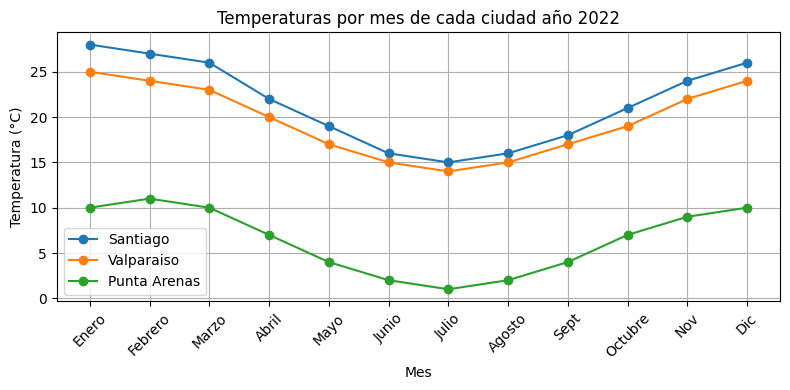

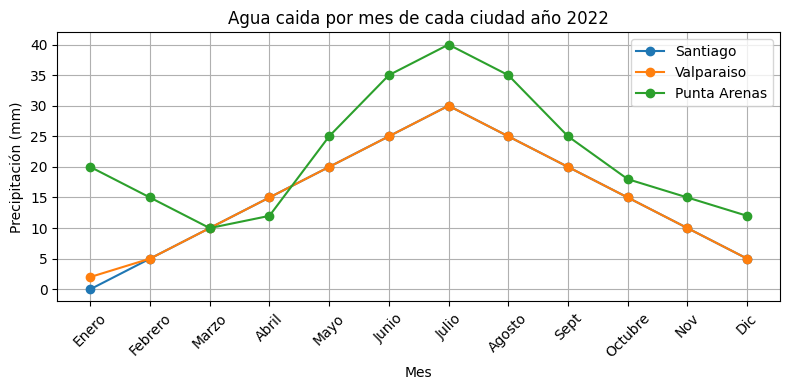

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import seaborn as sns
import glob as glob
import os
import shutil
import io
import requests
import ftplib
from ftplib import FTP


from google.colab import drive
drive.mount('/content/drive')



url="https://www.agendaqr.cl/santiagoano2022.csv"
s=requests.get(url).content
#print (listoffiles)
#c=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_Santiago = pd.read_csv (io.StringIO(s.decode('utf-8')),sep=';')

url="https://www.agendaqr.cl/Valparaisoano2022.csv"
s=requests.get(url).content
#print (listoffiles)
#c=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_Valparaiso = pd.read_csv (io.StringIO(s.decode('utf-8')),sep=';')

url="https://www.agendaqr.cl/PuntaArenasano2022.csv"
s=requests.get(url).content
#print (listoffiles)
#c=pd.read_csv(io.StringIO(s.decode('utf-8')))
df_PuntaArenas = pd.read_csv(io.StringIO(s.decode('utf-8')),sep=';')


# Agregamos las comumnas con ciudad y año para trabajar con esa información en el data frame
df_Santiago.insert(0,'Ciudad','Santiago')
df_Santiago.insert(2,'Año','2022')

df_Valparaiso.insert(0,'Ciudad','Valparaiso')
df_Valparaiso.insert(2,'Año','2022')

df_PuntaArenas.insert(0,'Ciudad','Punta Arenas')
df_PuntaArenas.insert(2,'Año','2022')

#unimos los 3 registros en un unico data frame
df=pd.concat([df_Santiago,df_Valparaiso,df_PuntaArenas])
df_presipitacion = df.loc[:, ['Ciudad', 'Precipitación (mm)']]
df_presipitacion.head()

# Revivion de DF
df


# Mapear nombres de meses en español a inglés para trabajar con formatos de fecha
meses_spanish_to_english = {
    'Enero': 'January',
    'Febrero': 'February',
    'Marzo': 'March',
    'Abril': 'April',
    'Mayo': 'May',
    'Junio': 'June',
    'Julio': 'July',
    'Agosto': 'August',
    'Sept': 'September',
    'Octubre': 'October',
    'Nov': 'November',
    'Dic': 'December'
}

# Convertir 'Mes' y 'Año' a fecha
df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Mes'].map(meses_spanish_to_english), format='%Y-%B')



# Visualizamos el encabezado del dataframe, si queremos ver completo quitamos el .head()
df.head()

#Cantidad de agua caida en Chile.
#Sumaremos la columna de Precipitaciones
cda_agua =df['Precipitación (mm)'].sum()
print("-----------------------------------------------------------------------")
print("-----------------------------------------------------------------------")
print("Prengunta 1.-Cantidad de agua caída en Chile en mm.")
print("La cantidad de agua caida en Chile es ",cda_agua,"mm de agua al año")
print("-----------------------------------------------------------------------")

# Creamos los 3 data frame por cada trimestre

df1 = df[df['Fecha'].dt.month.isin([1, 2, 3, 4])]
df2 = df[df['Fecha'].dt.month.isin([5, 6, 7, 8])]
df3 = df[df['Fecha'].dt.month.isin([9, 10, 11, 12])]

df1 = df1.loc[:, ['Fecha', 'Ciudad', 'Temperatura (°C)']]
df2 = df2.loc[:, ['Fecha', 'Ciudad', 'Temperatura (°C)']]
df3 = df3.loc[:, ['Fecha', 'Ciudad', 'Temperatura (°C)']]

#Ordenamos por fecha y ciudad
df1 = df1.sort_values(by=['Fecha', 'Ciudad'])
df2 = df2.sort_values(by=['Fecha', 'Ciudad'])
df3 = df3.sort_values(by=['Fecha', 'Ciudad'])

# Visualizaciones para control
#visualizamos las 3 dataframe con 3 filas
#...print (df1.head(3)),
#...print (df2.head(3)),
#...print (df3.head(3)),

# Sacamos el promedio por cada data frame y promediamos en 2 decimales
promedio_temp_df1 = round(df1['Temperatura (°C)'].mean(), 2)
promedio_temp_df2 = round(df2['Temperatura (°C)'].mean(), 2)
promedio_temp_df3 = round(df3['Temperatura (°C)'].mean(), 2)

print("Prengunta 2.-Cual es la Temperatura (°C) promedio por cada trimestre (agrupación de 4 meses) en Chile")
print ("Promedio de temperaturas para Primer Trimestre año 2022 (Enero a Abril):", promedio_temp_df1, "°C")
print("-----------------------------------------------------------------------")
print ( "Promedio de temperaturas para Segundo Trimestre año 2022 (Mayo a Agosto):", promedio_temp_df2, "°C")
print("-----------------------------------------------------------------------")
print ("Promedio de temperaturas para Tercer Trimestre año 2022 (Septiembre a Diciembre):", promedio_temp_df3, "°C")
print("-----------------------------------------------------------------------")

#creamos Data frame para las temeraturas
df_temperatura = df.loc[:, ['Ciudad', 'Temperatura (°C)']]
df_temperatura2 = df_temperatura.sort_values(by='Temperatura (°C)', ascending=True)



#encontrar la ciudad con la temperatura más alta
Indice_temperatura_max=df_temperatura['Temperatura (°C)'].idxmax()
ciudad_temperatura_max=df_temperatura.loc[Indice_temperatura_max,[ 'Ciudad', 'Temperatura (°C)']]


#Señalar que ciudad tuvo la temperatura más alta en el 2022.
print("Prengunta 3.-Señalar que ciudad tuvo la temperatura más alta y baja en el 2022")
print("La ciudad con la temperatura más alta fue:")
print(ciudad_temperatura_max[['Ciudad', 'Temperatura (°C)']].iloc[0])
print("-----------------------------------------------------------------------")

# Encontrar la ciudad con la temperatura más baja
indice_temperatura_min = df_temperatura2['Temperatura (°C)'].idxmin()
ciudad_temperatura_min = df_temperatura2.loc[indice_temperatura_min, ['Ciudad', 'Temperatura (°C)']]


#Señalar que ciudad tuvo la temperatura más baja en el 2022.
print("Ciudad con la temperatura más baja fue:")
print(ciudad_temperatura_min[['Ciudad', 'Temperatura (°C)']].iloc[0])
print("-----------------------------------------------------------------------")




print("iniciando la Grafica")


#Data Frame para graficar
df_temp_grafico = df.loc[:, ['Ciudad','Mes', 'Temperatura (°C)']]
df_agua_grafico = df.loc[:, ['Ciudad','Mes', 'Precipitación (mm)']]
# Obtener nombres únicos de ciudades
ciudades = df_temp_grafico['Ciudad'].unique()

# Configurar el gráfico
plt.figure(figsize=(8, 4))

# Iterar sobre cada ciudad
for ciudad in ciudades:
    # Filtrar datos por ciudad
    datos_ciudad = df_temp_grafico[df_temp_grafico['Ciudad'] == ciudad]

    # Graficar temperaturas por mes
    plt.plot(datos_ciudad['Mes'], datos_ciudad['Temperatura (°C)'], marker='o', label=ciudad)

# Configurar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Temperatura (°C)')
plt.title('Temperaturas por mes de cada ciudad año 2022')

# Añadir leyenda y mostrar el gráfico
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar diseño
#

# Obtener nombres únicos de ciudades
ciudades = df_agua_grafico['Ciudad'].unique()

# Configurar el gráfico
plt2.figure(figsize=(8, 4))

# Iterar sobre cada ciudad
for ciudad in ciudades:
    # Filtrar datos por ciudad
    datos_ciudad = df_agua_grafico[df_agua_grafico['Ciudad'] == ciudad]

    # Graficar temperaturas por mes
    plt2.plot(datos_ciudad['Mes'], datos_ciudad['Precipitación (mm)'], marker='o', label=ciudad)

# Configurar etiquetas y título
plt2.xlabel('Mes')
plt2.ylabel('Precipitación (mm)')
plt2.title('Agua caida por mes de cada ciudad año 2022')

# Añadir leyenda y mostrar el gráfico
plt2.legend()
plt2.grid(True)
plt2.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor visualización
plt2.tight_layout()  # Ajustar diseño

plt.show()
plt2.show()





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
